# Polynomials
https://en.wikipedia.org/wiki/Polynomial

In mathematics, a polynomial is an expression consisting of variables (also called indeterminates) and coefficients, that involves only the operations of addition, subtraction, multiplication, and non-negative integer exponents of variables. An example of a polynomial of a single indeterminate x is $x^2 − 4x + 7$. An example in three variables is $x^3 + 2xyz^22 − yz + 1$.

Polynomials appear in a wide variety of areas of mathematics and science. For example, they are used to form polynomial equations, which encode a wide range of problems, from elementary word problems to complicated problems in the sciences; they are used to define polynomial functions, which appear in settings ranging from basic chemistry and physics to economics and social science; they are used in calculus and numerical analysis to approximate other functions. In advanced mathematics, polynomials are used to construct polynomial rings and algebraic varieties, central concepts in algebra and algebraic geometry.


Given a polynomial of order $N$ 

$$ P(x) = a_0 + a_1 x + a_2 x^2 \ldots = \sum\limits_{n=0}^N a_n x^n $$

we can easily evaluate it at any arbitrary point $x_i$

$$ P(x_i) = \sum\limits_{n=0}^N a_n x_i^n $$


we can easily determine the derivative with respect to $x$

$$ \frac{d}{dx} P(x) = a_1 + 2 a_2 x \ldots $$

and the integral

$$  \int P(x) dx = C + a_0 x + \frac{1}{2} a_1 x^2 \ldots $$


Many functions can be approximated by Taylor series

$$ f(x) \approx c_0 + c_1 x + c_2 x^2 \ldots = \sum\limits_{n=0}^N c_n x^n $$



These calculations can be implemented using only core python

In [1]:
def poly_eval_basic_forward(x, coeff):
    """evaluate a polynomal
    """
    
    result = 0.0
    for n,c in enumerate(coeff):
        result = result + c * x**n
    return result

In [2]:
print( poly_eval_basic_forward(0.5, [0,1,2,3,4,5]) )

1.78125


## Horner's method

Exponentiation is computationally ``expensive'' (CPU intensive).  If we reverse the order of summation then we only need multiplication and addition
$$((c_N*x + c_{N-1} )*x + c_{N-2})* x \ldots + c_0$$
which can be calculated more quickly.

In [3]:
def poly_eval_basic_reverse(x, coeff):
    result = coeff[-1]
    for c in coeff[-2::-1]:
        result = result * x + c
    return result

In [4]:
print( poly_eval_basic_reverse(0.5, [0,1,2,3,4,5]) )

1.78125


## %timeit

The IPython interpreter can execute several ``magic'' commands that can be used for code analysis.  For example, we can show that Horner's method (reverse evaluation of polynomials) is roughly twice as fast as forward evaluation.

In [5]:
 %timeit poly_eval_basic_forward(0.5, [0,1,2,3,4,5])

The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.28 µs per loop


In [6]:
%timeit poly_eval_basic_reverse(0.5, [0,1,2,3,4,5])

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 635 ns per loop


## floating point math

Evaluating at $x=0.1$ for a large number of coefficients gives slightly different results from forward and reverse evaluation.

In [7]:
p1 = poly_eval_basic_forward(0.1, range(0,99,1) )
p2 = poly_eval_basic_reverse(0.1, range(0,99,1) )
print( p1, p2, p2-p1)

0.12345679012345678 0.12345679012345681 2.7755575615628914e-17


### Question 1: Why are the results for evaluating x=0.1 not exactly the same for the forward and reverse methods?  Should we worry about this?

## math

Python provides support for basic integer and floating point arithmetic as part of the language core.  Additional functionality is provided by the ``math'' module.  Information about these functions can be obtained by typing 
 ``dir(math)'' or ``help(math)''.

In [8]:
import math
help( math.factorial)
print( '99! =',  math.factorial(99) )

Help on built-in function factorial in module math:

factorial(...)
    factorial(x) -> Integral
    
    Find x!. Raise a ValueError if x is negative or non-integral.

99! = 933262154439441526816992388562667004907159682643816214685929638952175999932299156089414639761565182862536979208272237582511852109168640000000000000000000000


## numpy

Although the core python math is actually quite good, we will tend to use tools provided by the numpy and scipy modules.

<pre>
import numpy as np
import scipy.special as specfunc
</pre>

Numpy is especially useful for vectorized operations when we want to apply the same transformation to a sequence of numbers.  This can be done in python using lists, but using numpy arrays is often more convenient and usually much faster.

In [9]:
%timeit y = [x**2 for x in range(99)]


10000 loops, best of 3: 21.1 µs per loop


In [10]:
import numpy as np
%timeit y = np.arange(99)**2

The slowest run took 16.93 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 890 ns per loop


Note that the previous evaluation routines were written in such a way that we can pass numpy arrays instead of lists and everything will just work.

In [11]:
x = np.array([0.1, 0.5, 0.99])
coeff = np.arange(0,99,1)
poly_eval_basic_reverse(x, coeff)

array([  1.23456790e-01,   2.00000000e+00,   2.57935317e+03])

### Question 2: Write a function which uses numpy to evaluate the Taylor series expansion of sin(x) for an array of x, and an arbitrary number of terms ie.
<pre>
def sin_eval_taylor(x, ncoeff):
    """
     docstring goes here
    """
    ...
     calculations go here
    ...
    
    return result
</pre>

## matplotlib

Graphing and graphical display support is provided by the matplotlib module, typically imported as ``plt''.


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

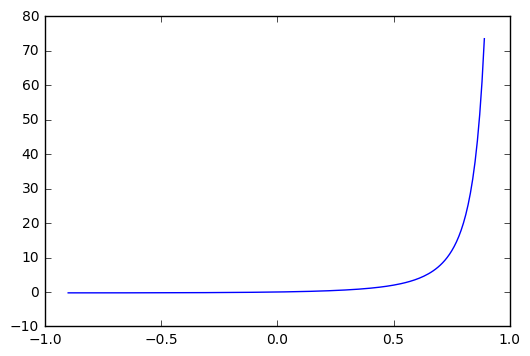

In [13]:
x = np.arange(-0.9, 0.9, 0.01)
coeff = np.arange(0,99,1)
y = poly_eval_basic_reverse(x, coeff)
plt.plot(x,y)

### Question 3: Use sin_eval_taylor to plot Taylor series expansions of sin(x) for order n=1, 3, 17, 29 and compare to the "true" value.  Try to make the figure look *exactly* like the one included below.

<img src="../fig/sin_taylor_series.png">

### Question 4: What are the absolute and the relative error (in percent) for Taylor series expansion of sin(x) at x=0.5 for n=3, 9, 29? Compare results of forward summing to reverse.  How else might we reduce roundoff error?


## Submit answers in a single Jupyter notebook to D2L by 9pm on Monday January 22.